In [1]:
import pandas as pd


The first file *dataset_site_info.parquet* provides historical information about **data storage on disk** (for *AOD* and *AODSIM*).
In particular, it contains the physical location (which site on the grid) the data replicas are stored over time.
It covers the period from 2019-01-01 to 2020-12-31.

In [2]:
filepath1 = './../data/dataset_site_info.parquet'
df1 = pd.read_parquet(filepath1)

df1.head(None)


,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier
0,/JetHT/Run2016B-21Feb2020_ver2_UL2016_HIPM-v1/AOD,1553410,20200619,T2_US_Purdue,2.570957e+10,2020-06-20,2020-12-31,42.0,AOD
1,/PAMinimumBias4/PARun2016C-PromptReco-v1/AOD,951505,20171015,T2_IN_TIFR,2.668056e+13,2019-01-01,2020-06-10,42.0,AOD
2,/GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...,1114967,20200113,T2_FI_HIP,2.060427e+11,2020-01-14,2020-04-29,42.0,AODSIM
3,/WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...,1247050,20200323,T2_US_Caltech,1.034198e+13,2020-03-23,2020-05-05,22.0,AODSIM
4,/HLTPhysics/Commissioning2017-PromptReco-v1/AOD,998897,20200212,T2_EE_Estonia,1.705387e+11,2020-02-13,2020-03-25,42.0,AOD
...,...,...,...,...,...,...,...,...,...
1268205,/GluGluHToWWToLNuQQ_M140_NNPDF31_TuneCP5_PSwei...,1353747,20190611,T2_FR_IPHC,4.005138e+09,2019-06-12,2019-06-26,18.0,AODSIM
1268206,/ggZH_HToGG_ZToNuNu_M125_13TeV_powheg_pythia8_...,1307530,20190402,T1_US_FNAL_Disk,1.705961e+09,2019-04-03,2019-04-09,18.0,AODSIM
1268207,/ST_tW_top_5f_NoFullyHadronicDecays_13TeV_PSwe...,1332017,20190506,T2_BE_UCL,5.500226e+08,2019-05-06,2019-07-12,18.0,AODSIM
1268208,/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_T...,1573739,20200724,T2_US_Wisconsin,8.395474e+10,2020-09-30,2020-10-01,NaN,AODSIM


To have a general overview of data storage on disk, the total amount of data across the entire grid is plotted, grouping by site-tier (*T1s* or *T2s*) and data-tier (*AOD* or *AODSIM*).

- data are stored as replicas (copies) and each replica usually contains just a fraction of the whole corresponding dataset
- more than one replica of the same data can be stored in different sites at the same time
- distinct replicas containing different data but belonging to the same dataset can be stored even in the same site at the same time
- the total amout of stored data may be greater (if there are many/large replicas) or smaller (if there are few/small replicas) than the total size of unique datasets

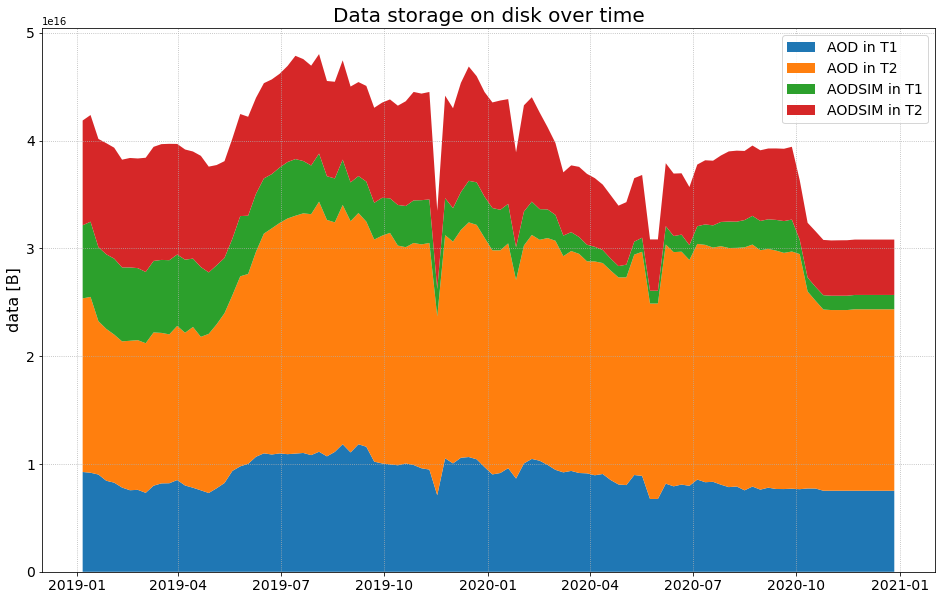

In [3]:
import pylab as plt
from datetime import date

fig, ax = plt.subplots(figsize=(16, 10))

start = date(2019, 1, 1)
end = date(2020, 12, 31)
timeline = [dt.date() for dt in pd.date_range(start, end, freq='W')]
labels = ['AOD in T1', 'AOD in T2', 'AODSIM in T1', 'AODSIM in T2']

values = []
for label in labels:
    d_tier, s_tier = label.split(' in ')
    df = df1[(df1['tier'] == d_tier) & (df1['node_name'].str.contains(s_tier))]
    values.append([df[(df['min_time'] <= date) & (date <= df['max_time'])]['rep_size'].sum()
                   for date in timeline])
ax.stackplot(timeline, values, labels=labels)
ax.set_title('Data storage on disk over time', fontsize=20)
ax.set_ylabel('data [B]', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.legend(fontsize=14)
ax.grid(linestyle='dotted')


The second file *dataset_size_info.parquet* consists in a **list of all datasets** (*AOD* and *AODSIM*) together with some of their general information (e.g. dataset size, number of files, number of events).
Note that some of these datasets may not appear in the first file because they were not stored on disk in the time period considered.

In [4]:
filepath2 = './../data/dataset_size_info.parquet'
df2 = pd.read_parquet(filepath2)

df2.head(None)


,d_dataset,dsize,nfiles,devts,tier
0,/Exotica_RSGravitonEE_M750_001/Summer08_IDEAL_...,2.902498e+09,3,21182,AODSIM
1,/Exotica_RSGravitonDiJetM700/Summer08_IDEAL_V1...,4.898815e+09,63,31603,AODSIM
2,/Exotica_BPrimeTW_M300/Summer08_IDEAL_V11_redi...,1.166423e+10,105,64600,AODSIM
3,/PhotonJets200toInf-madgraph/Fall08_IDEAL_V11_...,6.694212e+11,549,5186502,AODSIM
4,/PhotonJet_Pt20to30/Summer09-MC_31X_V3_AODSIM-...,1.216578e+10,15,116508,AODSIM
...,...,...,...,...,...
128706,/Cosmics/Tier0_REPLAY_2021-PromptReco-v2107242...,4.620219e+10,14,2558476,AOD
128707,/Cosmics/Tier0_REPLAY_2021-PromptReco-v2107260...,2.194992e+09,2,314308,AOD
128708,/Wprime_ggF_WZ_WhadZlep_narrow_M4000_TuneCP5_1...,2.128891e+10,7,50000,AODSIM
128709,/ZJetsToNuNu_HT-800To1200_TuneCP5_13TeV-madgra...,2.379383e+11,106,703970,AODSIM


### Summary for *dataset_site_info.parquet*

In [5]:
aod1 = df1[df1['tier'] == 'AOD']
num_aod1 = aod1['dataset_name'].nunique()
totsize_aod1 = aod1.groupby('dataset_name').agg('max')['rep_size'].sum() / 1e15
print(f'number_of_AOD_datasets = {num_aod1}')
print(f'total_size_of_AOD_data = {round(totsize_aod1, 3)} PB')

sim1 = df1[df1['tier'] == 'AODSIM']
num_sim1 = sim1['dataset_name'].nunique()
totsize_sim1 = sim1.groupby('dataset_name').agg('max')['rep_size'].sum() / 1e15
print(f'number_of_AODSIM_datasets = {num_sim1}')
print(f'total_size_of_AODSIM_data = {round(totsize_sim1, 3)} PB')


number_of_AOD_datasets = 4407
total_size_of_AOD_data = 25.438 PB
number_of_AODSIM_datasets = 46339
total_size_of_AODSIM_data = 25.154 PB


### Summary for *dataset_size_info.parquet*

In [6]:
aod2 = df2[df2['tier'] == 'AOD']
num_aod2 = aod2['d_dataset'].nunique()
totsize_aod2 = aod2['dsize'].sum() / 1e15
print(f'number_of_AOD_datasets = {num_aod2}')
print(f'total_size_of_AOD_data = {round(totsize_aod2, 3)} PB')

sim2 = df2[df2['tier'] == 'AODSIM']
num_sim2 = sim2['d_dataset'].nunique()
totsize_sim2 = sim2['dsize'].sum() / 1e15
print(f'number_of_AODSIM_datasets = {num_sim2}')
print(f'total_size_of_AODSIM_data = {round(totsize_sim2, 3)} PB')


number_of_AOD_datasets = 19161
total_size_of_AOD_data = 40.434 PB
number_of_AODSIM_datasets = 109550
total_size_of_AODSIM_data = 73.577 PB


### Loading data retrieved by MCM

In [7]:
from cmSim.utils import get_mcm_data

mcm_data = get_mcm_data('./../data/zip_mcm_dump.json')

example = mcm_data['/SingleElectronPt35/Summer12_DR53X-PU_S10_START53_V7A-v1/AODSIM']
print('\nDATASET INFORMATION IN MCM')
print(list(example.keys()))


Reading zipped json file... Done

DATASET INFORMATION IN MCM
['total_events', 'config_id', 'events_per_lumi', 'cmssw_release', 'mcdb_id', 'transient_output_modules', 'sequences', 'block_black_list', 'block_white_list', 'interested_pwg', 'process_string', 'ppd_tags', 'fragment_tag', 'generator_parameters', 'flown_with', 'priority', 'version', 'generators', 'analysis_id', 'memory', 'type', '_rev', 'status', 'keep_output', 'energy', 'tags', 'fragment', '_id', 'time_event', 'pwg', 'member_of_chain', 'approval', 'name_of_fragment', 'pileup_dataset_name', 'pilot', 'input_dataset', 'reqmgr_name', 'prepid', 'extension', 'size_event', 'notes', 'completed_events', 'history', 'output_dataset', 'member_of_campaign', 'validation', 'dataset_name', 'cadi_line']


<ipython-input-8-a4c6306d2e79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sim2['pwg'] = sim2['d_dataset'].apply(get_pwg_from_dataset, mcm_data=mcm_data)


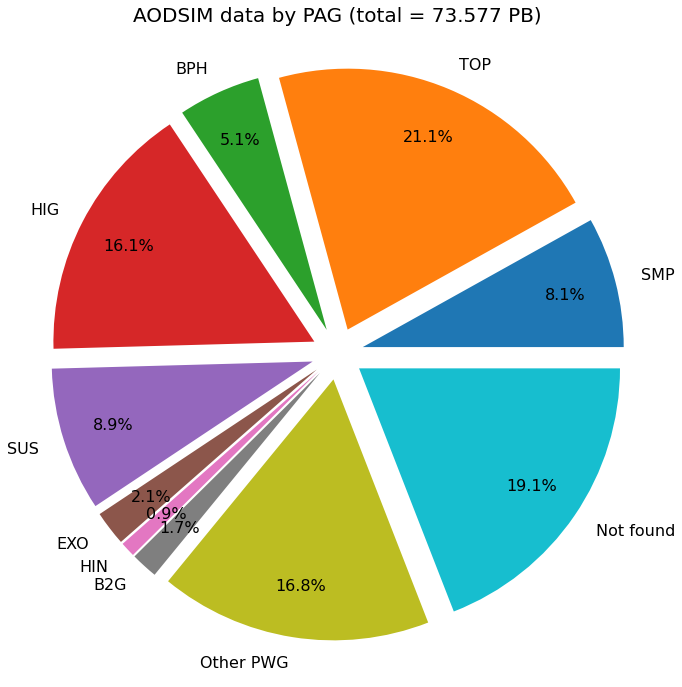

In [8]:
from cmSim.utils import get_pwg_from_dataset, get_pwgs

sim2['pwg'] = sim2['d_dataset'].apply(get_pwg_from_dataset, mcm_data=mcm_data)

fig, ax = plt.subplots(figsize=(12, 12))
plt.rcParams['font.size'] = 16

d = {}
pags = get_pwgs(group='pags')
for pag in pags:
    d[pag] = sim2[sim2['pwg'] == pag]['dsize'].sum()
pog_or_dpg = sim2[(sim2['pwg'] != 'None') & (~sim2['pwg'].isin(pags))]
d['Other PWG'] = pog_or_dpg['dsize'].sum()
no_pwg = sim2[sim2['pwg'] == 'None']
d['Not found'] = no_pwg['dsize'].sum()
total = round(sim2['dsize'].sum() / 1e15, 3)

labels = list(d.keys())
data = [d[label] for label in labels]
ax.pie(data, labels=labels, normalize=True, explode=[0.1]*len(data),
       autopct='%1.1f%%', pctdistance=0.8)
ax.set_title(f'AODSIM data by PAG (total = {total} PB)', fontsize=20)

plt.show()


In [9]:
def get_num_and_size(df):
    num = df['d_dataset'].nunique()
    size = round(df['dsize'].sum() / 1e15, 3)
    return num, size


sim2_with_pwg = sim2[sim2['pwg'] != 'None']
num_with_pwg, size_with_pwg = get_num_and_size(df=sim2_with_pwg)
print('\nDATASETS ASSOCIATED WITH PWG')
print(f'number = {num_with_pwg}')
print(f'total_size = {size_with_pwg} PB')

sim2_with_pag = sim2_with_pwg[sim2_with_pwg['pwg'].isin(pags)]
num_with_pag, size_with_pag = get_num_and_size(df=sim2_with_pag)
print('\nDATASETS ASSOCIATED WITH PAG')
print(f'number = {num_with_pag}')
print(f'total_size = {size_with_pag} PB')

sim1_datasets = sim1['dataset_name'].unique()
data = sim2_with_pag[sim2_with_pag['d_dataset'].isin(sim1_datasets)]
num, size = get_num_and_size(df=data)
print('\nDATASETS ASSOCIATED WITH PAG (STORED ON DISK)')
print(f'number = {num}')
print(f'total_size = {size} PB')



DATASETS ASSOCIATED WITH PWG
number = 75551
total_size = 59.534 PB

DATASETS ASSOCIATED WITH PAG
number = 70793
total_size = 47.145 PB

DATASETS ASSOCIATED WITH PAG (STORED ON DISK)
number = 37284
total_size = 23.695 PB
